In [3]:
# Helper Functions
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
from reference_data import (
    geoid_to_county_name,
    state_to_fips,
    state_abbreviation_to_state_name,
    state_fip_to_county_to_geoid,
)
pa_fips_code = str(state_to_fips['Pennsylvania']).zfill(2)
def get_county_name_pa(county_fips):
    geoid = pa_fips_code + str(county_fips).zfill(3)
    assert(len(geoid) == 5)
    return geoid_to_county_name[geoid]

county_to_geoid_pa = state_fip_to_county_to_geoid[int(pa_fips_code)]
def get_geoid_pa(county_name):
    return county_to_geoid_pa[county_name]

## Looking for similarities in Precinct Names
Want to find a way to relate the precinct names of the cenus partnership files to the names of the precincts in the election results from MEDSL or Open Elections

### MEDSL
#### Validation/ Sanity Check for MEDSL results

In [4]:
state_df_piv_mit = pd.read_csv('data/MEDSL/PA_G18_MIT.csv')
national_df_mit = pd.read_csv('data/MEDSL/precinct_2018.csv', encoding = "ISO-8859-1")
state_df_mit = national_df_mit.loc[national_df_mit.state == 'Pennsylvania']
state_df_mit['county'] = state_df_mit['county'].map(str) + ' County'
state_df_mit['COUNTYFP'] = state_df_mit['county'].map(get_geoid_pa)
state_df_mit['prec_vtd'] = state_df_mit['precinct'].apply(lambda x: str(x).zfill(6))
state_df_mit = state_df_mit[['precinct', 'prec_vtd', 'office', 'party', 'mode', 'votes', 'jurisdiction',
       'county', 'COUNTYFP', 'candidate', 'district', 'dataverse', 'year',
       'stage', 'state', 'special', 'writein', 'state_po', 'state_fips',
       'state_cen', 'state_ic']]
state_df_mit.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,precinct,prec_vtd,office,party,mode,votes,jurisdiction,county,COUNTYFP,candidate,...,dataverse,year,stage,state,special,writein,state_po,state_fips,state_cen,state_ic
9816506,10,000010,US Senate,democrat,total,120,Adams,Adams County,42001,Robert P Casey Jr,...,senate,2018,gen,Pennsylvania,False,False,PA,42,23,14
9816507,20,000020,US Senate,democrat,total,151,Adams,Adams County,42001,Robert P Casey Jr,...,senate,2018,gen,Pennsylvania,False,False,PA,42,23,14
9816508,30,000030,US Senate,democrat,total,74,Adams,Adams County,42001,Robert P Casey Jr,...,senate,2018,gen,Pennsylvania,False,False,PA,42,23,14
9816509,40,000040,US Senate,democrat,total,289,Adams,Adams County,42001,Robert P Casey Jr,...,senate,2018,gen,Pennsylvania,False,False,PA,42,23,14
9816510,50,000050,US Senate,democrat,total,152,Adams,Adams County,42001,Robert P Casey Jr,...,senate,2018,gen,Pennsylvania,False,False,PA,42,23,14


In [5]:
df = state_df_mit
df[(df.county == 'Allegheny County') & (df.prec_vtd.isin({'000130', '000140', '000151', '000161'})) & (df.office == 'Governor')][['prec_vtd', 'candidate', 'votes']]

,prec_vtd,candidate,votes
9822402,000130,Thomas W Wolf,223
9822403,000140,Thomas W Wolf,454
9823726,000130,Scott R Wagner,120
9823727,000140,Scott R Wagner,197
9825050,000130,Paul Glover,1
9825051,000140,Paul Glover,2
9826374,000130,Kenneth V Krawchuk,5
9826375,000140,Kenneth V Krawchuk,5


In [6]:
state_df_piv_mit

,precinct,G18DStSen,G18DHOR,G18DSEN,votes green State Senate,votes green US Senate,G18LStSen,G18LHOR,votes libertarian US Senate,G18RStSen,G18RHOR,G18RSEN
0,"Adams,10",0.0,108.0,120.0,0.0,2.0,0.0,0.0,5.0,0.0,201.0,183.0
1,"Adams,100",0.0,421.0,477.0,0.0,8.0,0.0,0.0,6.0,0.0,921.0,863.0
2,"Adams,110",0.0,455.0,495.0,0.0,3.0,0.0,0.0,8.0,0.0,499.0,456.0
3,"Adams,120",0.0,181.0,210.0,0.0,6.0,0.0,0.0,8.0,0.0,489.0,448.0
4,"Adams,130",0.0,380.0,421.0,0.0,5.0,0.0,0.0,17.0,0.0,494.0,436.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9178,"York,950",860.0,1016.0,1052.0,0.0,16.0,0.0,0.0,24.0,1811.0,1655.0,1586.0
9179,"York,960",256.0,285.0,283.0,0.0,12.0,0.0,0.0,18.0,586.0,565.0,529.0
9180,"York,970",0.0,560.0,602.0,0.0,14.0,0.0,0.0,34.0,0.0,1506.0,1423.0
9181,"York,980",0.0,234.0,263.0,0.0,6.0,0.0,0.0,11.0,0.0,806.0,756.0


In [7]:
wolf_votes_nytimes = 2895652 
gov_can_to_votes = state_df_mit[state_df_mit.office == 'Governor'].groupby('candidate').votes.sum()
print(gov_can_to_votes)
gov_can_to_votes['Thomas W Wolf'] / wolf_votes_nytimes

candidate
Kenneth V Krawchuk      49232
Paul Glover             27797
Scott R Wagner        2040169
Thomas W Wolf         2895848
Name: votes, dtype: int64


1.000067687691753

Results don't match perfectly, but Tom Wolf's vote count only differs by 0.0067687691753 %

ImportError: The descartes package is required for plotting polygons in geopandas.

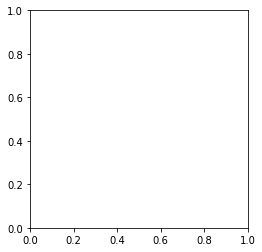

In [8]:
gdf = gpd.read_file('data/compiled')
gdf['county'] = gdf['COUNTYFP'].map(get_county_name_pa)
gdf = gdf[['STATEFP', 'county', 'COUNTYFP', 'VTDST', 'NAMELSAD', 'VTDI', 'LSAD', 'CHNG_TYPE', 'ORIG_NAME', 'ORIG_CODE', 'RELATE', 'NAME', 'VINTAGE', 'FUNCSTAT', 'JUSTIFY', 'MTFCC', 'geometry']]
gdf.plot()
plt.show()

Census Partnership VTDs are missing shapefiles for Armstrong, Delaware, and Westmoreland counties

In [ ]:
gdf.head()

The precincts in MEDSL resutls look like the `VTDST` column in the VTD shapefile.

In [9]:
county_to_vtds_census = gdf.groupby('county')['VTDST'].unique().to_dict()
county_to_vtds_medsl = state_df_mit.groupby('county')['prec_vtd'].unique().to_dict()

In [10]:
print(set(county_to_vtds_medsl.keys()).difference(set(county_to_vtds_census.keys())))
set(county_to_vtds_census.keys()).difference(set(county_to_vtds_medsl.keys()))

{'Armstrong County', 'Delaware County', 'Westmoreland County'}


set()

In [11]:
county_to_vtd_diff = {}
county_to_vtd_percentage_match = {}
n_vtds_matches_statewide = 0
n_vtds_total_statewide = 0
for county_name in county_to_vtds_medsl.keys():
    county_vtds_medsl = set(county_to_vtds_medsl[county_name])
    county_vtds_census = set(county_to_vtds_census.get(county_name, set()))
    vtd_diff = county_vtds_medsl.symmetric_difference(county_vtds_census)
    vtd_intersection = county_vtds_medsl.intersection(county_vtds_census)
    n_vtds_matches = len(vtd_intersection)
    n_vtds_total = max(len(county_vtds_census), len(county_vtds_medsl))
    county_to_vtd_diff[county_name] = vtd_diff
    county_to_vtd_percentage_match[county_name] = n_vtds_matches/n_vtds_total
    n_vtds_matches_statewide += n_vtds_matches
    n_vtds_total_statewide += n_vtds_total

print("{:.3f}% of VTDs match between the election results and census partnership files".format(n_vtds_matches_statewide/n_vtds_total_statewide))

0.551% of VTDs match between the election results and census partnership files


In [12]:
df_percentage_match = pd.DataFrame.from_dict(county_to_vtd_percentage_match, orient='index').rename(columns={0:'percent match'})
df_diff = pd.DataFrame.from_dict(county_to_vtd_diff, orient='index')

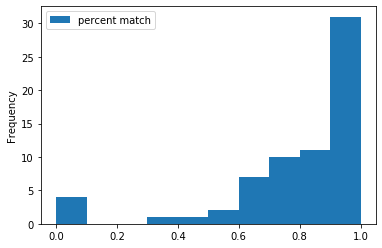

In [13]:
df_percentage_match.sort_values(by='percent match').plot(kind='hist')

Only 11 out of 67 counties match perfectly and 30 out of 67 counties have at least 90% matches. 

In [ ]:
df_percentage_match['Northumberland County']

In [15]:
cnty_id_lst = ['Somerset County', 'Schuylkill County','Butler County', 'Clearfield County', 'Westmoreland County']

for county_id in cnty_id_lst:
    print(county_id, df_percentage_match.loc[county_id])
    print()

Somerset County percent match    1.0
Name: Somerset County, dtype: float64

Schuylkill County percent match    0.512
Name: Schuylkill County, dtype: float64

Butler County percent match    0.757895
Name: Butler County, dtype: float64

Clearfield County percent match    0.971429
Name: Clearfield County, dtype: float64

Westmoreland County percent match    0.0
Name: Westmoreland County, dtype: float64



### Open Elections

Known issues: Inconsitent candidate names: Tom Wolf has around 10. Could address this by pivotting and aggregating votes by party + office. For now this can be ignored and we can just look at precinct matches

In [24]:
df_oe = pd.read_csv('data/open-elections/20181106__pa__general__precinct.csv')
df_oe['county'] = df_oe['county'].apply(lambda x: x.strip() + ' County') 
df_oe['COUNTYFP'] = df_oe['county'].map(get_geoid_pa)
df_oe = df_oe[['precinct', 'county', 'COUNTYFP', 'office', 'district', 'candidate', 'party', 'votes', 'election_day', 'absentee']]
df_oe.head()

,precinct,county,COUNTYFP,office,district,candidate,party,votes,election_day,absentee
0,Carroll Township,York County,42133,U.S. Senate,NaN,"Bob CASEY, JR.",Dem,958,NaN,NaN
1,Carroll Township,York County,42133,U.S. Senate,NaN,Lou BARLETTA,Rep,1858,NaN,NaN
2,Carroll Township,York County,42133,U.S. Senate,NaN,Neal GALE,Grn,18,NaN,NaN
3,Carroll Township,York County,42133,U.S. Senate,NaN,"Dale R. KERNS, JR.",LIB,32,NaN,NaN
4,Carroll Township,York County,42133,U.S. Senate,NaN,Write-In,NaN,0,NaN,NaN


In [38]:
county_to_prec_census = gdf.groupby('county')['NAME'].unique().to_dict()
county_to_prec_oe = df_oe.groupby('county')['precinct'].unique().to_dict()

In [40]:
for county_name in county_to_prec_oe.keys():
    county_vtds_oe = sorted(list(county_to_prec_oe[county_name]))
    county_vtds_census = sorted(list(county_to_prec_census.get(county_name, set())))
    print(county_vtds_oe, '\n\n',county_vtds_census)
    break

['Abbottstown', 'Arendtsville', 'Bendersville', 'Berwick', 'Biglerville', 'Bonneauville', 'Butler', 'Carroll Valley #1', 'Carroll Valley #2', 'Conewago #1', 'Conewago #2', 'Cumberland #1', 'Cumberland #2', 'Cumberland #3', 'Cumberland #4', 'East Berlin', 'Fairfield', 'Franklin #1', 'Franklin #2', 'Freedom', 'Germany', 'Gettysburg #1', 'Gettysburg #2', 'Gettysburg #3', 'Hamilton', 'Hamiltonban', 'Highland', 'Huntington', 'Latimore', 'Liberty', 'Littlestown #1', 'Littlestown #2', 'McSherrystown #1', 'McSherrystown #2', 'Menallen', 'Mt Joy #1', 'Mt Joy #2', 'Mt Pleasant #1', 'Mt Pleasant #2', 'New Oxford', 'Oxford #1', 'Oxford #2', 'Reading #1', 'Reading #2', 'Straban #1', 'Straban #2', 'Tyrone', 'Union', 'York Springs'] 

 ['ABBOTTSTOWN', 'ARENDTSVILLE', 'BENDERSVILLE', 'BERWICK', 'BIGLERVILLE', 'BONNEAUVILLE', 'BUTLER', 'CARROLL VALLEY DISTRICT 01', 'CARROLL VALLEY DISTRICT 02', 'CONEWAGO DISTRICT 01', 'CONEWAGO DISTRICT 02', 'CUMBERLAND DISTRICT 01', 'CUMBERLAND DISTRICT 02', 'CUMBERLA